# Deducing from Codeup Website Log

## Acquire

First, I looked at the raw data in a google docs page. I concluded each column ought to be separated by a space. The columns appear to be date, time, webpage address, an unknown number, another unknown number, and IP address, respectively.

<img src='codeup_log.png'>

The plan is to run a read_csv using " " as the delimiter and see where that gets us. I'd imagine I'm going to want to merge date and time into a timestamp index column (converted into datetime of course). Further, I'll want to do some investigation into what those odd numbers might mean.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from sklearn import metrics
from scipy.stats import entropy
import warnings
warnings.filterwarnings("ignore")
import acquire

In [32]:
log = acquire.get_log()

## Explore

In [33]:
log.head()

,page,x,y,ip
timestamp,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [34]:
log.describe()

,x,y
count,399195.000000,372441.000000
mean,268.794667,26.912649
std,147.587312,7.846146
min,1.000000,1.000000
25%,157.000000,23.000000
50%,288.000000,27.000000
75%,392.000000,31.000000
max,543.000000,52.000000


In [35]:
log.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399195 entries, 2018-01-26 09:55:03 to 2019-11-19 10:07:45
Data columns (total 4 columns):
page    399195 non-null object
x       399195 non-null int64
y       372441 non-null float64
ip      399195 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 15.2+ MB


In [36]:
log.ip.nunique()

2585

In [37]:
log.ip.value_counts()

97.105.19.58       227220
97.105.19.61        61662
192.171.117.210      8127
70.122.40.62         1338
66.69.108.117        1199
173.174.211.206      1019
108.65.244.91        1007
170.248.173.245       997
67.11.157.190         972
66.69.62.219          934
70.118.8.243          876
72.181.104.64         865
170.248.173.247       828
216.1.153.162         823
67.11.215.97          818
76.185.131.226        793
173.173.113.51        779
67.11.239.2           777
99.61.24.168          765
67.10.174.56          739
72.181.98.75          681
45.23.250.16          663
67.10.161.55          651
136.50.18.71          631
76.204.31.63          618
4.16.216.161          610
72.181.110.80         607
170.248.173.246       590
67.10.166.10          578
70.121.163.5          577
                    ...  
172.58.109.223          1
107.77.197.78           1
107.77.222.90           1
107.77.221.36           1
172.56.7.193            1
107.77.221.42           1
99.203.27.24            1
172.56.6.37 

In [38]:
codeup_ips = ['97.105.19.58', '97.105.19.61']

In [39]:
log.x.value_counts()

53     8236
64     8008
11     8004
344    5279
1      4266
314    3233
423    2995
323    2846
354    2821
211    2625
418    2598
127    2563
410    2398
277    2367
347    2318
325    2248
363    2237
433    2217
337    2183
186    2180
274    2136
315    2130
416    2103
368    2063
304    2061
272    2008
197    1993
275    1900
264    1898
269    1894
       ... 
137      10
279      10
84       10
141       9
95        9
388       8
107       8
104       8
401       7
115       6
152       5
399       5
71        5
169       5
82        5
62        4
216       4
85        4
246       4
348       3
177       3
89        3
176       3
81        3
97        2
66        1
461       1
163       1
165       1
212       1
Name: x, Length: 543, dtype: int64

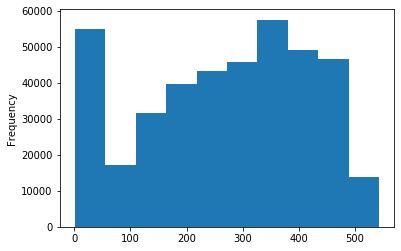

In [40]:
log.x.plot.hist()

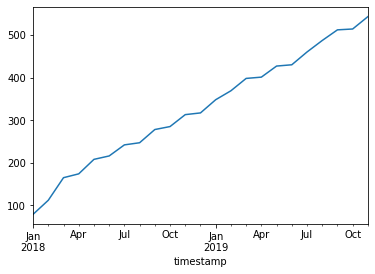

In [58]:
log.resample('M').x.max().plot.line()

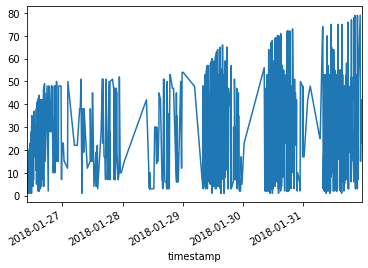

In [42]:
log['2018-01'].x.plot()

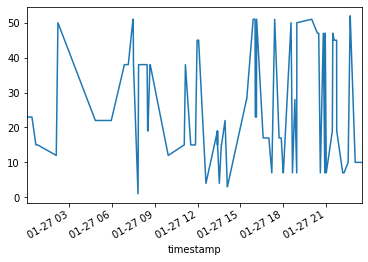

In [43]:
log['2018-01-27'].x.plot()

In [53]:
log.y.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: y, dtype: int64

In [57]:
log[log.ip == '66.42.139.162']
log[log.x == 85]
log['2018-02-04']

,page,x,y,ip
timestamp,,,,
2018-02-04 01:07:07,/,5,22.0,24.155.251.203
2018-02-04 01:07:14,javascript-i,5,22.0,24.155.251.203
2018-02-04 01:07:19,javascript-i/bom-and-dom/dom,5,22.0,24.155.251.203
2018-02-04 02:09:28,/,84,18.0,172.110.83.150
2018-02-04 02:09:30,html-css,84,18.0,172.110.83.150
2018-02-04 02:09:33,mkdocs/search_index.json,84,18.0,172.110.83.150
2018-02-04 02:09:59,git/intellij,84,18.0,172.110.83.150
2018-02-04 02:31:52,javascript-i/bom-and-dom/dom-events,23,22.0,108.65.244.91
2018-02-04 02:32:09,javascript-i/google-maps-api,23,22.0,108.65.244.91


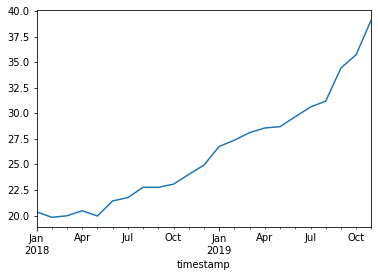

In [44]:
log.resample('M').mean().y.plot()

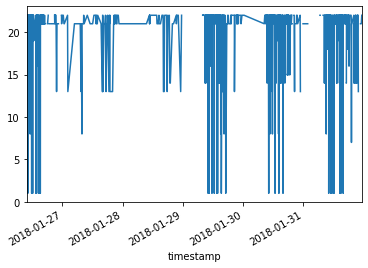

In [45]:
log['2018-01'].y.plot()

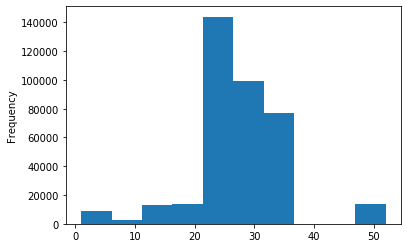

In [50]:
log.y.plot.hist()

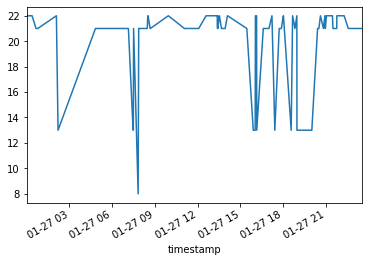

In [46]:
log['2018-01-27'].y.plot()

In [48]:
log.corr()

,x,y
x,1.00000,0.74925
y,0.74925,1.00000


In [49]:
log.page.value_counts()

/                                                                            20564
javascript-i                                                                  8140
search/search_index.json                                                      7005
toc                                                                           6679
html-css                                                                      6143
java-iii                                                                      6003
spring                                                                        5761
jquery                                                                        5501
java-ii                                                                       5386
mysql                                                                         5103
java-i                                                                        5039
javascript-ii                                                                 5024
mysq

likely instructors: 1 (zach), 11 (ryan), 248 (maggie), 404 (david)

geekdom IP: 192.171.117.210

In [59]:
log.groupby('y').nunique()

,page,x,y,ip
y,,,,
1.0,342,18,1,46
2.0,44,3,1,6
4.0,4,1,1,1
6.0,45,2,1,12
7.0,127,6,1,25
8.0,258,4,1,13
9.0,4,1,1,1
11.0,76,5,1,12
12.0,109,4,1,7


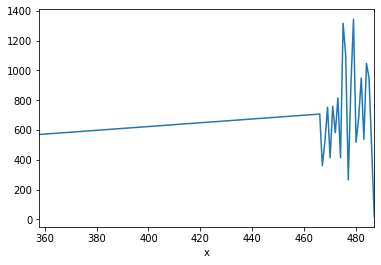